## KNN for regression, rather than classification, problems


K-Nearest Neighbors (KNN) for regression is a non-parametric method used in predictive modeling to estimate the continuous output variable based on the similarity of input data points. Here's a breakdown of what KNN regression is and why you might choose to use it:

### What is KNN for Regression?

In the context of regression, KNN works by finding the `K` closest points (neighbors) to the query point in the feature space. The predicted value for the query point is then typically the average (mean or median) of the dependent variables of these neighbors. The steps involved in KNN regression include:

1. **Select the Number of Neighbors (`K`)**: Decide how many nearest neighbors to consider. The choice of `K` affects the predictions significantly.
2. **Choose a Distance Metric**: Common metrics include Euclidean, Manhattan, or Minkowski distances. This metric will determine how "closeness" is calculated between points.
3. **Search for Nearest Neighbors**: For each data point where you want to make a prediction, locate the `K` nearest neighbors based on the chosen distance metric.
4. **Aggregate the Neighbors’ Outputs**: Compute the mean or median of the target values of these neighbors to get the prediction.

### Why Use KNN for Regression?

**Simplicity and Flexibility**: KNN is simple to understand and implement. It doesn't assume anything about the underlying data distribution, which makes it quite flexible to use in real-world scenarios where the data may not meet the assumptions required by other algorithms.

**Effectiveness in Small Datasets**: KNN can be very effective with smaller datasets where complex models might overfit. It works well when the relationship between variables is intuitively close in the feature space but may be non-linear or complex to model explicitly.

**No Training Phase**: KNN is a lazy algorithm, meaning it doesn't explicitly learn a model. Instead, it uses the entire dataset for training during the prediction phase. This feature makes KNN quick to update and adapt as new data points become available.

**Robustness to Noisy Training Data**: By using the median or weighted averages instead of the mean, KNN can become more robust against noise and outliers in the dataset.

### Considerations

**Dimensionality**: KNN suffers from the curse of dimensionality. Performance and speed degrade rapidly with an increase in the number of features due to the increased volume of the input space and the sparsity of data in high-dimensional space.

**Computational Cost**: Since KNN requires computing distances to all training instances, it can be computationally expensive, particularly with large datasets. Using efficient data structures like KD-Trees or approximate nearest neighbors can mitigate this.

**Scaling and Normalization**: Because KNN relies on distance computations, proper scaling and normalization of features are crucial to its performance.

**Choosing `K` and Distance Metric**: The selection of `K` and the distance metric can significantly influence the model's performance. These need to be chosen carefully, often validated through techniques like cross-validation.

KNN for regression is a valuable tool in the data scientist’s toolkit, especially valuable in scenarios where the data does not meet typical assumptions of linearity and where model simplicity and interpretability are important.

K-Nearest Neighbors (KNN) is a versatile algorithm that can be used for both classification and regression tasks. In regression problems, KNN predicts the output value for a new data point by averaging the values of the K nearest neighbors. Here’s how KNN works for regression:

1. **Feature Selection**: Choose the features or attributes based on which the distances between the data points will be calculated. These features should be numeric for distance computation.

2. **Distance Metric**: Select a method to measure the distance between data points. Common metrics include Euclidean, Manhattan, and Minkowski distances. The choice of metric can depend on the data distribution and the problem context.

3. **Number of Neighbors (K)**: Determine the value of K, which is the number of nearest neighbors to consider for making the prediction. The value of K is a critical parameter and can significantly affect the model’s performance. A smaller K can make the model sensitive to noise in the data, while a larger K makes it computationally expensive and potentially less precise as it considers more distant neighbors.

4. **Finding Nearest Neighbors**: For a given test instance, compute the distance from this point to all points in the training dataset using the selected distance metric.

5. **Prediction**: Calculate the target value for the test point by averaging the values of the K nearest neighbors. Unlike classification, where the mode (most frequent label) among the K-neighbors is chosen, in regression, the prediction is typically the mean or median of the values of these neighbors.

6. **Model Evaluation**: Evaluate the model using appropriate regression metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), or Mean Absolute Error (MAE). These metrics help in understanding the average error between the predicted and actual values.

### Example
Suppose we have a dataset with house features like size (sq ft), number of bedrooms, age of the house, and the target variable is the house price. If we want to predict the price of a new house based on its features using KNN regression:
- We would calculate the distance between this new house’s features and all other houses in our training dataset.
- Select the K closest houses, let's say K=5.
- Compute the average price of these 5 closest houses.
- Use this average price as the predicted price for the new house.

KNN regression is straightforward to implement but has its challenges, such as choosing the optimal K, dealing with high dimensional data (curse of dimensionality), and ensuring that the features are on a comparable scale (feature scaling). It’s particularly useful in scenarios where the data distribution or relationships between variables are not well understood, as it makes very few assumptions about the form of the data distribution.

Let's dive deeper into the nuances of implementing KNN for regression, focusing on each step of the process, optimizations, and common pitfalls:

### 1. **Feature Selection**
   - **Relevance**: It's essential to select features that are relevant to the output variable. Irrelevant features can introduce noise and reduce the accuracy of the model.
   - **Scaling**: KNN relies on distance calculations, so all features must be scaled to ensure that no single feature dominates the distance computation. Techniques like Min-Max scaling or Standardization (Z-score scaling) are commonly used.

### 2. **Distance Metric**
   - **Euclidean Distance**: Most common and suitable for many situations, calculated as the square root of the sum of squared differences between corresponding elements.
   - **Manhattan Distance**: Used when the difference across dimensions is binary or when data is not evenly distributed; it sums the absolute differences.
   - **Minkowski Distance**: A generalization of both Euclidean and Manhattan distances. It has a parameter \( p \) that can be adjusted: \( p=2 \) corresponds to Euclidean, and \( p=1 \) to Manhattan.

### 3. **Choosing the Number of Neighbors (K)**
   - **Cross-validation**: To find the optimal value of K, you can perform cross-validation. Split your data into several subsets and try different values of K to see which provides the best performance on a validation set.
   - **Bias-Variance Tradeoff**: A smaller K can lead to a model that captures noise in the data (high variance), whereas a larger K may smooth over important details (high bias).

### 4. **Finding Nearest Neighbors**
   - **Efficient Search**: Naive methods compute distances to all training points, which can be inefficient for large datasets. Algorithms like KD-Tree, Ball Tree, or using approximate nearest neighbor techniques can speed up this process significantly.

### 5. **Making Predictions**
   - **Mean vs. Median**: The mean is sensitive to outliers, whereas the median is more robust. Depending on the nature of the data, you might prefer to use the median of the K nearest values as the prediction instead of the mean.
   - **Weighted Averages**: Instead of giving equal importance to all K neighbors, you can weigh them according to their distance from the query point. Neighbors that are closer can be given a higher weight, making the prediction more locally sensitive.

### 6. **Model Evaluation**
   - **Regression Metrics**: Evaluate your model using metrics like:
     - **Mean Squared Error (MSE)**: Measures the average of the squares of the errors.
     - **Root Mean Squared Error (RMSE)**: Square root of MSE, more interpretable in the same units as the response variable.
     - **Mean Absolute Error (MAE)**: Measures the average magnitude of the errors in a set of predictions, without considering their direction.
   - **Residual Plots**: Plotting residuals (differences between observed and predicted values) can help diagnose issues like non-linearity, outliers, and whether residuals are randomly distributed.

### Common Pitfalls and Optimizations
- **Dimensionality Curse**: As the number of features increases, the volume of the input space increases exponentially, and the data becomes sparse. This sparsity makes it difficult for KNN to find meaningful nearest neighbors. Dimensionality reduction techniques like PCA (Principal Component Analysis) can be used to mitigate this.
- **Dataset Size**: KNN can be slow for large datasets because it requires calculating and sorting distances for each prediction. Using algorithmic improvements for nearest neighbor searches is crucial in these cases.
- **Feature Engineering**: Sometimes, transforming features (e.g., using polynomial features or interaction terms) can help capture relationships that improve the model's performance.

By understanding these detailed aspects of KNN regression, you can more effectively tune and implement the model to suit specific datasets and prediction tasks.

Sure, let's go through a concrete example of using KNN for regression, including how to visualize the results. We'll use a simple synthetic dataset to predict a target variable based on one feature for clarity and visualization ease. I'll provide you with the Python code to generate the data, apply the KNN regression, and plot the results.

### Example: Predicting House Prices Based on Square Footage

We'll create a synthetic dataset where the house prices increase nonlinearly with square footage, and then apply KNN regression to predict prices for new square footage values.

#### Step 1: Import Required Liboverall trend of the data, showing how prices increase with square footage.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Step 2: Generate Synthetic Data



In [10]:
# Generate random square footages between 1000 and 5000 square feet
np.random.seed(0)
X = 1000 + 4000 * np.random.rand(100, 1)
# Prices increase nonlinearly with some added noise
y = 100000 + (X - 1000) ** 1.5 + 10000 * np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Step 3: Scale the Data

In [11]:
# Scale features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Step 4: Apply KNN Regression

In [12]:
# Use KNN with K=5
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train.ravel())

KNeighborsRegressor()

#### Step 5: Prediction and Visualization

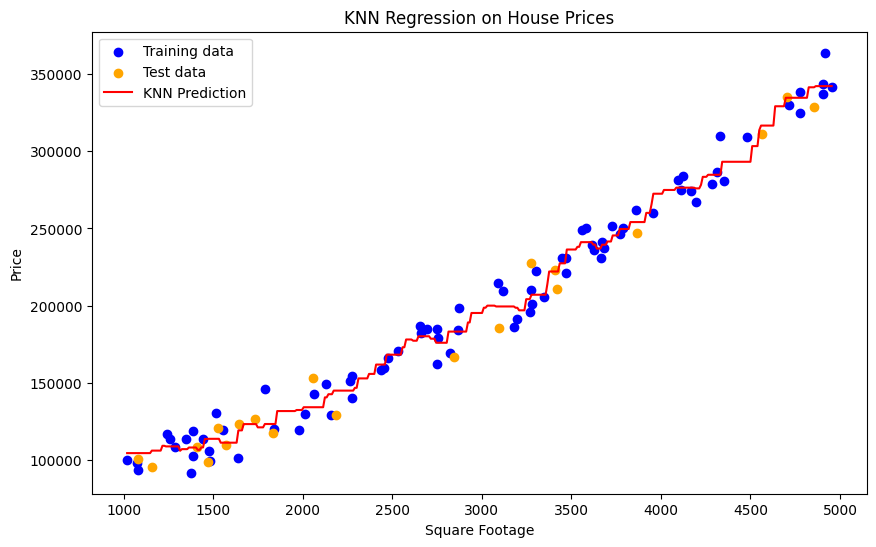

In [8]:
# Generate points for prediction line
x_points = np.linspace(min(X), max(X), 400).reshape(-1, 1)
x_points_scaled = scaler.transform(x_points)

# Predict prices
predicted_prices = knn_regressor.predict(x_points_scaled)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='orange', label='Test data')
plt.plot(x_points, predicted_prices, color='red', label='KNN Prediction')
plt.title('KNN Regression on House Prices')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.show()

### Explanation

- **Data Preparation**: We generate synthetic data where `X` is the square footage and `y` is the price of the house. We add some random noise to make it more realistic.
- **Scaling**: KNN requires feature scaling because it relies on the distance between data points.
- **Model Fitting**: We fit a KNN regressor to the training data.
- **Prediction and Plot**: We predict over a smooth set of points to show the prediction curve. The training data is shown in blue, the test data in green, and the KNN regression predictions in red.

This plot will give you a clear visual representation of how KNN has modeled the relationship between house square footage and price. The predicted curve should capture the overall trend of the data, showing how prices increase with square footage.

https://www.kaggle.com/code/hamzatanc/k-nearest-neighbors-regression

https://realpython.com/knn-python/

https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html